## **Bank Churn Probability Predict**

<div class="alert alert-block alert-info">
    <b>Metric of Evalutaion: ROC-AUC </b>
</div>



### **Brief Description of the Features**

https://www.kaggle.com/competitions/playground-series-s4e1/data

1. id - Unique ID. 

2. CustomerID - Customer ID is not a unique ID, there are few customer IDs which have more than 80 repetitive occurrences.

3. Surname - This is the surname of the customer, there are too many repititions. Actually there are only around 2700 unique surnames. 성

4. Credit Score - Your creditworthiness is rated by a three-digit figure called a credit score. 300 to 850 is the range of FICO scores. You have a better chance of getting approved for loans and better prices the higher your score. Now in our dataset there are range of values starting from 350 and going up to 850. Now this can be a very useful information while thinking about the churning. #신용점수 #높을수록 굿

5. Geography - There are 3 unique values - France, Spain, and Germany. One has to use Label Encoder or OneHotEncoder to encode these values.

6. Gender - There are only 2 unique values - Male and Female. Here a label binarizer is enough for the encoding purposes.

7. Age - Depicts the age of the customers. There are all possible values starting from 18 up to 92. There are 2 anomalies found in the age column - there 2 values in float - 32.44 and 36.44. It would be better if we can round those values to 32 and 36 respectively.

8. Tenure - It might show from how many years the customer has been related to the bank or may be vice versa. There are values ranging from 0 to 10. Most probably these values are in years. #은행 거래년수 

9. Balance - This is the bank balance of the customer. There were many doubts in the discussion forum that the bank balance was 0. When I performed the analysis, I found that actually 89000+ people had 0 bank balance. While the maximum amount recorded was around 250,000. #잔액

10. Number of Products - Now this can be a very difficult question. While there are only 4 unique values possible - 1, 2, 3, and 4. This can be attributes to how many major/big products the customer owns. Or other explanation might be that how many products the customer has bought on loan. #제품 갯수 - 대출로 산 제품(1,2,3,4)

11. Has Credit Card - Clear cut, whether the customer has a credit card or not. Same goes for the next column as well Is Active Member. Joke - I have read in one of the famous investor's article - Credit card is actually for those people who do not need it. #신용카드 보유 여부

12. Estimated Salary - What is the estimated salary of the individual. Now, this is a very important aspect of the real life scenario. Whenever you are given a credit from the bank, they mostly ask for whether or not you are salaried. If you are estimated of getting a higher salary, easier for them to credit you a higher amount of loan. #예상 월급

13. IsActiveMember: Whether the customer is an active member

**And last the 'exited' is the target variable.**

### **Import Dataset**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

%matplotlib inline

In [5]:
import os 
os.getcwd()

'C:\\Users\\medici\\04-2 bank churn predict'

In [6]:
bank_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

### **Describe Dataset**

In [7]:
bank_df.shape

(165034, 14)

In [8]:
test_df.shape

(110023, 13)

In [9]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


There are no missing values for both train and test sets.

In [83]:
#pip install PrettyTable

In [12]:
#컬럼별 유니크 값 확인하기
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Features","Unique Values"]
table.add_row(['total value',  bank_df.shape[0]])
for i in list(bank_df.columns) :
    nunique =bank_df[str(i)].nunique
    table.add_row([i, f"{nunique()}"])
print('Unique values in synthetically generated dataset : \n')
print(table)


Unique values in synthetically generated dataset : 

+-----------------+---------------+
|     Features    | Unique Values |
+-----------------+---------------+
|   total value   |     165034    |
|        id       |     165034    |
|    CustomerId   |     23221     |
|     Surname     |      2797     |
|   CreditScore   |      457      |
|    Geography    |       3       |
|      Gender     |       2       |
|       Age       |       71      |
|      Tenure     |       11      |
|     Balance     |     30075     |
|  NumOfProducts  |       4       |
|    HasCrCard    |       2       |
|  IsActiveMember |       2       |
| EstimatedSalary |     55298     |
|      Exited     |       2       |
+-----------------+---------------+


In [13]:
table = PrettyTable()
table.field_names = ["Features","Unique Values"]
table.add_row(['total value',  test_df.shape[0]])
for i in list(test_df.columns) :
    nunique =test_df[str(i)].nunique
    table.add_row([i, f"{nunique()}"])
print('Unique values in synthetically generated dataset : \n')
print(table)


Unique values in synthetically generated dataset : 

+-----------------+---------------+
|     Features    | Unique Values |
+-----------------+---------------+
|   total value   |     110023    |
|        id       |     110023    |
|    CustomerId   |     19698     |
|     Surname     |      2708     |
|   CreditScore   |      454      |
|    Geography    |       3       |
|      Gender     |       2       |
|       Age       |       74      |
|      Tenure     |       11      |
|     Balance     |     22513     |
|  NumOfProducts  |       4       |
|    HasCrCard    |       2       |
|  IsActiveMember |       2       |
| EstimatedSalary |     41670     |
+-----------------+---------------+


In [14]:
#make unique col drop datsset
new_bank_df = bank_df.drop('id', axis=1)

In [15]:
new_bank_df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [16]:
new_bank_df.groupby('Surname')['Exited'].value_counts()

Surname  Exited
Abazu    0          1
Abbie    0          3
         1          1
Abbott   0         21
         1          3
                   ..
Zuev     1          3
Zuyev    0         45
         1         13
Zuyeva   0         50
         1         10
Name: count, Length: 4909, dtype: int64

### **EDA**

In [17]:
new_bank_df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [18]:
numeric_cols= new_bank_df.select_dtypes(include='number').columns.tolist()
category_cols = ['Geography', 'Gender']
print(f'nunumeric_cols = {numeric_cols}, \ncategory_cols = {category_cols}')

nunumeric_cols = ['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'], 
category_cols = ['Geography', 'Gender']


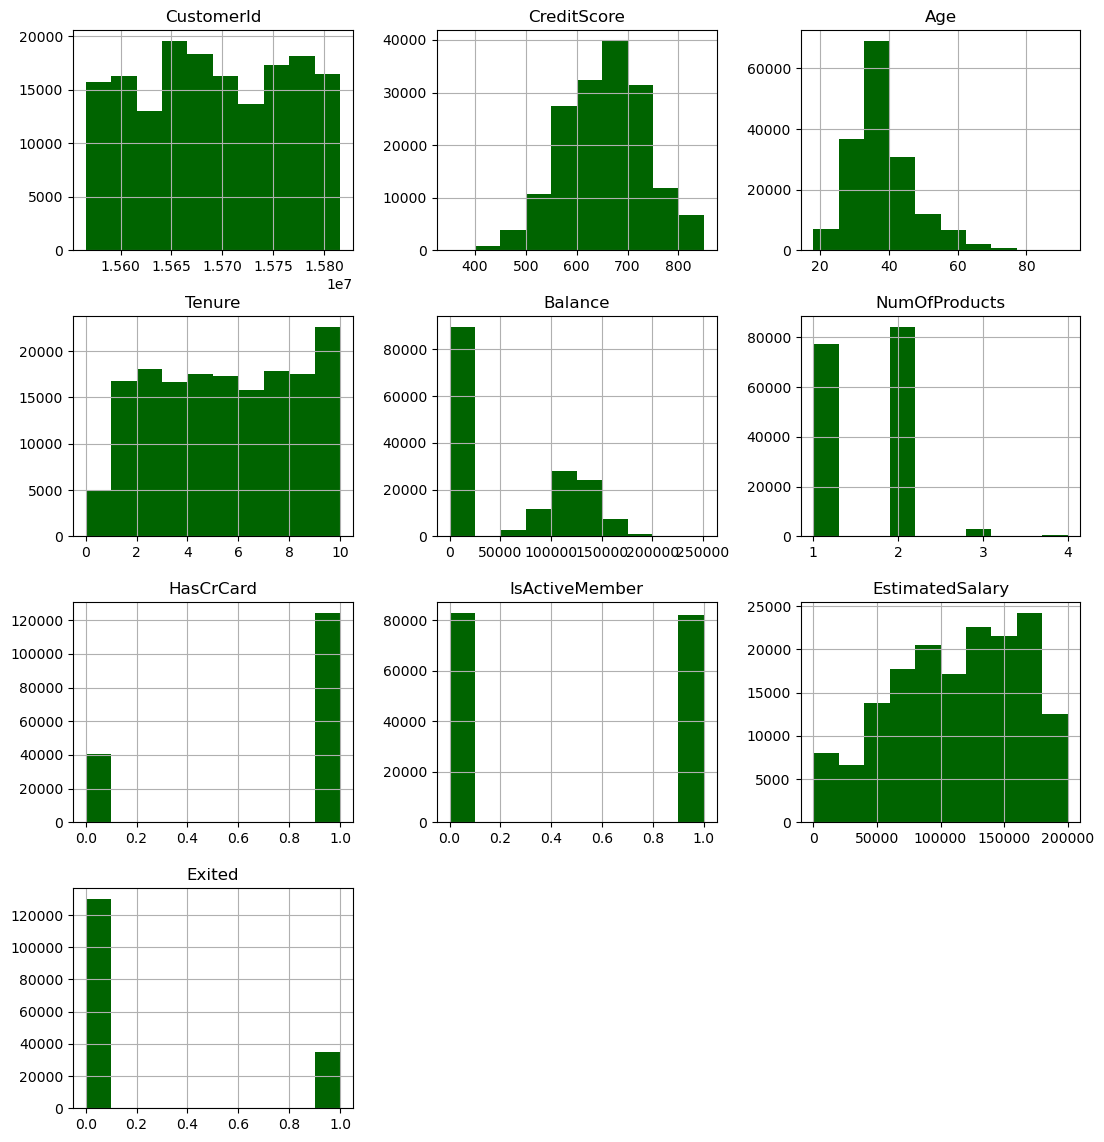

In [19]:
#값의 분포 확인하기 
new_bank_df[numeric_cols].hist(bins=10, figsize=(13,14), color='darkgreen');

In [18]:
#예측 클래스 Exited -> 불균형

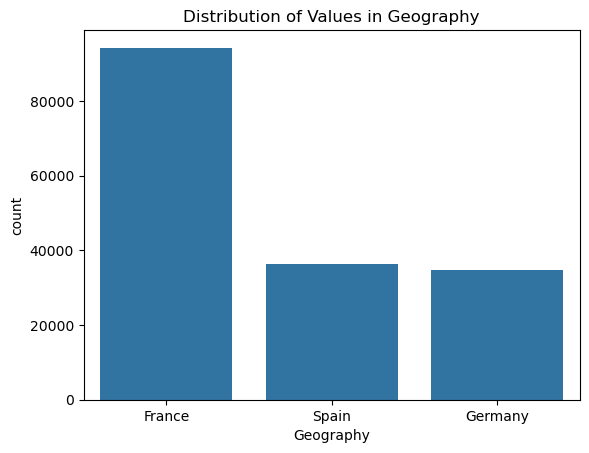

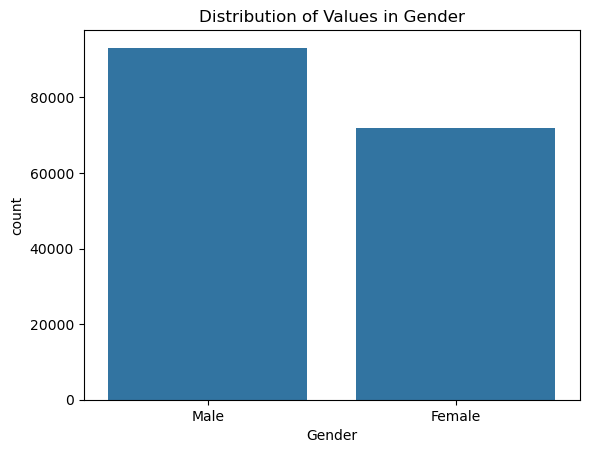

In [20]:
for col in category_cols:
    sns.countplot(x=col, data=new_bank_df)
    plt.title(f'Distribution of Values in {col}')
    plt.show()

'Geograph','Gender' -> On Hot Encoding

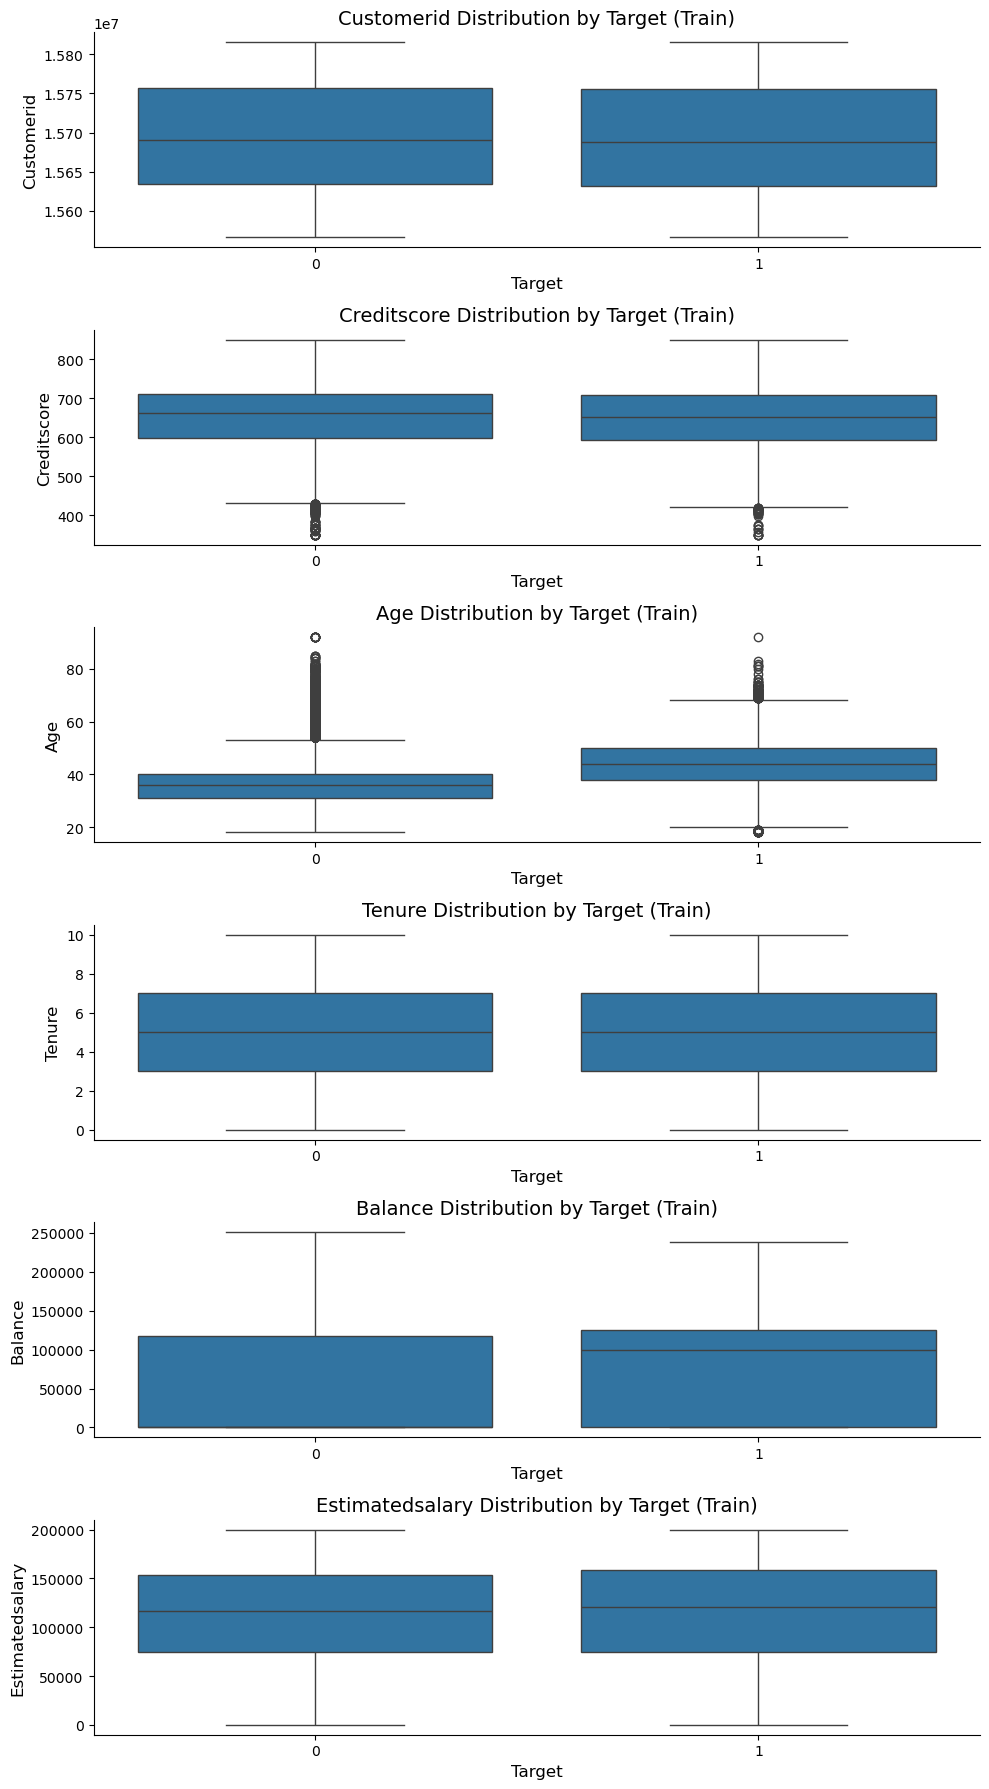

In [21]:
#feature-target realtionship
cont_cols = [f for f in new_bank_df[numeric_cols] if new_bank_df[f].nunique() > 10]
n_rows = len(cont_cols)
fig, axs = plt.subplots(n_rows, 1, figsize=(10, 3 * n_rows))
sns.set_palette("Set3")

for i, col in enumerate(cont_cols):
    sns.boxplot(x='Exited', y=col, data=new_bank_df, ax=axs[i])
    axs[i].set_title(f'{col.title()} Distribution by Target (Train)', fontsize=14)
    axs[i].set_xlabel('Target', fontsize=12)
    axs[i].set_ylabel(col.title(), fontsize=12)
    sns.despine()

plt.tight_layout()
plt.show()

- 'CreditScore', 'Age', 'Numofproducts' has outlier. 
- 전부 비슷하나 Age컬럼에서 이탈의 평균 연령이 더 높음을 확인할 수 있다.

#### 이상치 확인

In [22]:
#이상치 임계값(경계값) 구하는 함수
def outlier_threshoulds(dataframe, variable):
    Q1 = dataframe[variable].quantile(0.25)
    Q3 = dataframe[variable].quantile(0.75)
    IQR_range = Q3 - Q1
    up_fence = Q3 + 1.5 * IQR_range
    low_fence = Q1 - 1.5 * IQR_range
    return low_fence, up_fence

In [23]:
#이상치 개수 세는 함수 
def count_outliers(dataframe, variable):
    Q1 = dataframe[variable].quantile(0.25)
    Q3 = dataframe[variable].quantile(0.75)
    IQR_range = Q3 - Q1
    up_fence = Q3 + 1.5 * IQR_range
    low_fence = Q1 - 1.5 * IQR_range
    outliers_count = dataframe[(dataframe[variable] < low_fence) | (dataframe[variable] > up_fence)].shape[0]
    
    return outliers_count

In [24]:
new_bank_df['Age'] = new_bank_df['Age'].astype(int)
test_df['Age'] = test_df['Age'].astype(int)

In [25]:
test_df['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 110023 entries, 0 to 110022
Series name: Age
Non-Null Count   Dtype
--------------   -----
110023 non-null  int32
dtypes: int32(1)
memory usage: 429.9 KB


In [26]:
count_outliers(new_bank_df, 'Age')

6394

In [27]:
outlier_threshoulds(new_bank_df, 'Age')

(17.0, 57.0)

In [28]:
len(new_bank_df['Age'][new_bank_df['Age'] > 57])

6394

In [29]:
len(new_bank_df['Age'][new_bank_df['Age'] >= 70])

822

In [30]:
#이상치 값 대체 ;상한값, 하한값으로 대체 

def replace_with_thresholds(dataframe, variable, low_fence): 
    dataframe.loc[(dataframe[variable] < low_fence), variable] = low_fence
    dataframe.loc[(dataframe[variable] > 70), variable] = 70
    return dataframe

In [31]:
replace_with_thresholds(new_bank_df, 'Age', 17.0)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,Okwudilichukwu,668,France,Male,33,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,15667085,Meng,667,Spain,Female,33,2,0.00,1,1.0,1.0,131834.75,0
165030,15665521,Okechukwu,792,France,Male,35,3,0.00,1,0.0,0.0,131834.45,0
165031,15664752,Hsia,565,France,Male,31,5,0.00,1,1.0,1.0,127429.56,0
165032,15689614,Hsiung,554,Spain,Female,30,7,161533.00,1,0.0,1.0,71173.03,0


In [32]:
replace_with_thresholds(test_df, 'Age', 17.0)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32,3,0.00,1,1.0,1.0,158816.58


In [33]:
#Age의 이상치는 임계치의 상한 경계선에 있음
#구간화를 위해 

In [34]:
new_bank_df['Age'][new_bank_df['Age'] <= 19]

523       19
606       19
923       19
1037      19
1073      19
          ..
162469    18
163065    19
163256    18
163261    18
163887    18
Name: Age, Length: 332, dtype: int32

In [35]:
new_bank_df['Age'].describe()

count    165034.000000
mean         38.109656
std           8.801724
min          18.000000
25%          32.000000
50%          37.000000
75%          42.000000
max          70.000000
Name: Age, dtype: float64

In [36]:
#전체의 약 4% 이상치 비중
count_outliers(new_bank_df, 'Age') / new_bank_df['Age'].shape[0] * 100

3.8743531635905324

In [37]:
count_outliers(new_bank_df, 'CreditScore') 

253

In [38]:
outlier_threshoulds(new_bank_df, 'CreditScore')

(427.5, 879.5)

In [39]:
new_bank_df['CreditScore'].describe()

count    165034.000000
mean        656.454373
std          80.103340
min         350.000000
25%         597.000000
50%         659.000000
75%         710.000000
max         850.000000
Name: CreditScore, dtype: float64

In [40]:
#전체의 약 0.1% 이상치 비중
count_outliers(new_bank_df, 'CreditScore') / new_bank_df['CreditScore'].shape[0] * 100

0.15330174388307863

In [41]:
count_outliers(new_bank_df, 'NumOfProducts') 

475

In [42]:
outlier_threshoulds(new_bank_df, 'NumOfProducts')

(-0.5, 3.5)

In [43]:
new_bank_df['NumOfProducts'].describe()

count    165034.000000
mean          1.554455
std           0.547154
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           4.000000
Name: NumOfProducts, dtype: float64

In [44]:
#전체의 약 0.2% 이상치 비중
count_outliers(new_bank_df, 'NumOfProducts') / new_bank_df['NumOfProducts'].shape[0] * 100

0.28781947962238086

'NumOfProducts'가 이산적인 값들을 가지고 있어서 따라서 이 변수에 대해서는 이상치를 제거하는 것이 적절하지 않습니다. 'Age'와 'CreditScore'는 이상치와 다른 데이터 값들간의 스케일의 차이가 크지 않지만, 작은 분포를 갖고 있어 이상치가 된 경우입니다. 이 경우에는 이상치가 모델에 영향을 미치는 경우가 있을 수 있으므로, 이상치를 제거하지 않도록 하겠습니다.

대신 로버스트 스케일링을 하여 이상치에 대한 영향을 줄이도록 하겠습니다.



=> **로버스트 스케일링** 

<Figure size 800x600 with 0 Axes>

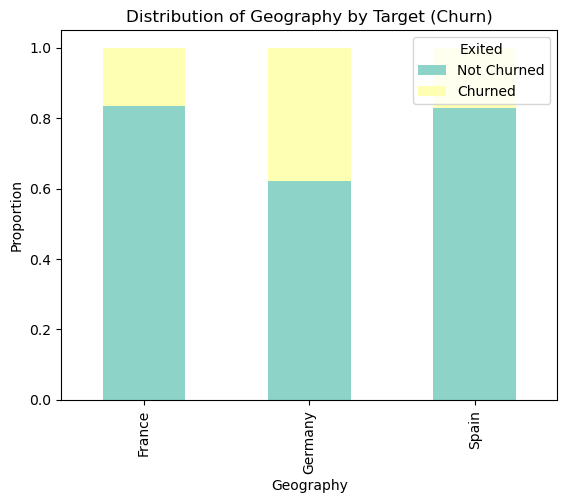

<Figure size 800x600 with 0 Axes>

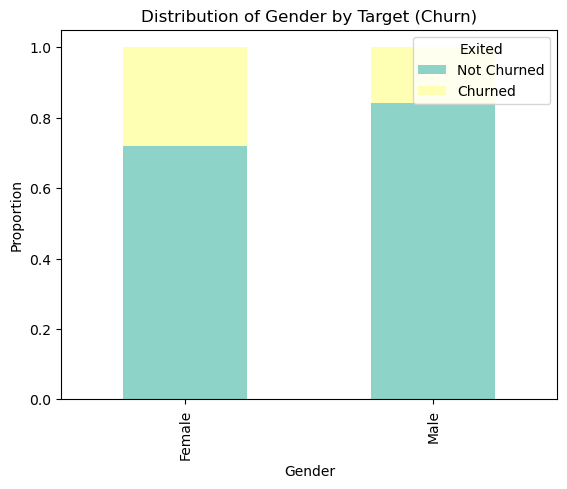

In [45]:
for col in category_cols:
    plt.figure(figsize=(8, 6))
    
    # Calculate the proportion of 'Exited' for each category
    prop_df = pd.crosstab(new_bank_df[col], new_bank_df['Exited'], normalize='index')
    
    # Plot the stacked bar chart
    prop_df.plot(kind='bar', stacked=True)
    
    plt.title(f'Distribution of {col} by Target (Churn)')
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
    plt.show()

피쳐들에 대한 타겟의 비율로 볼 떄, 'Geography'는 'Germany' , 'Gender'에서는 'Female'이 높음을 볼 수 있음.


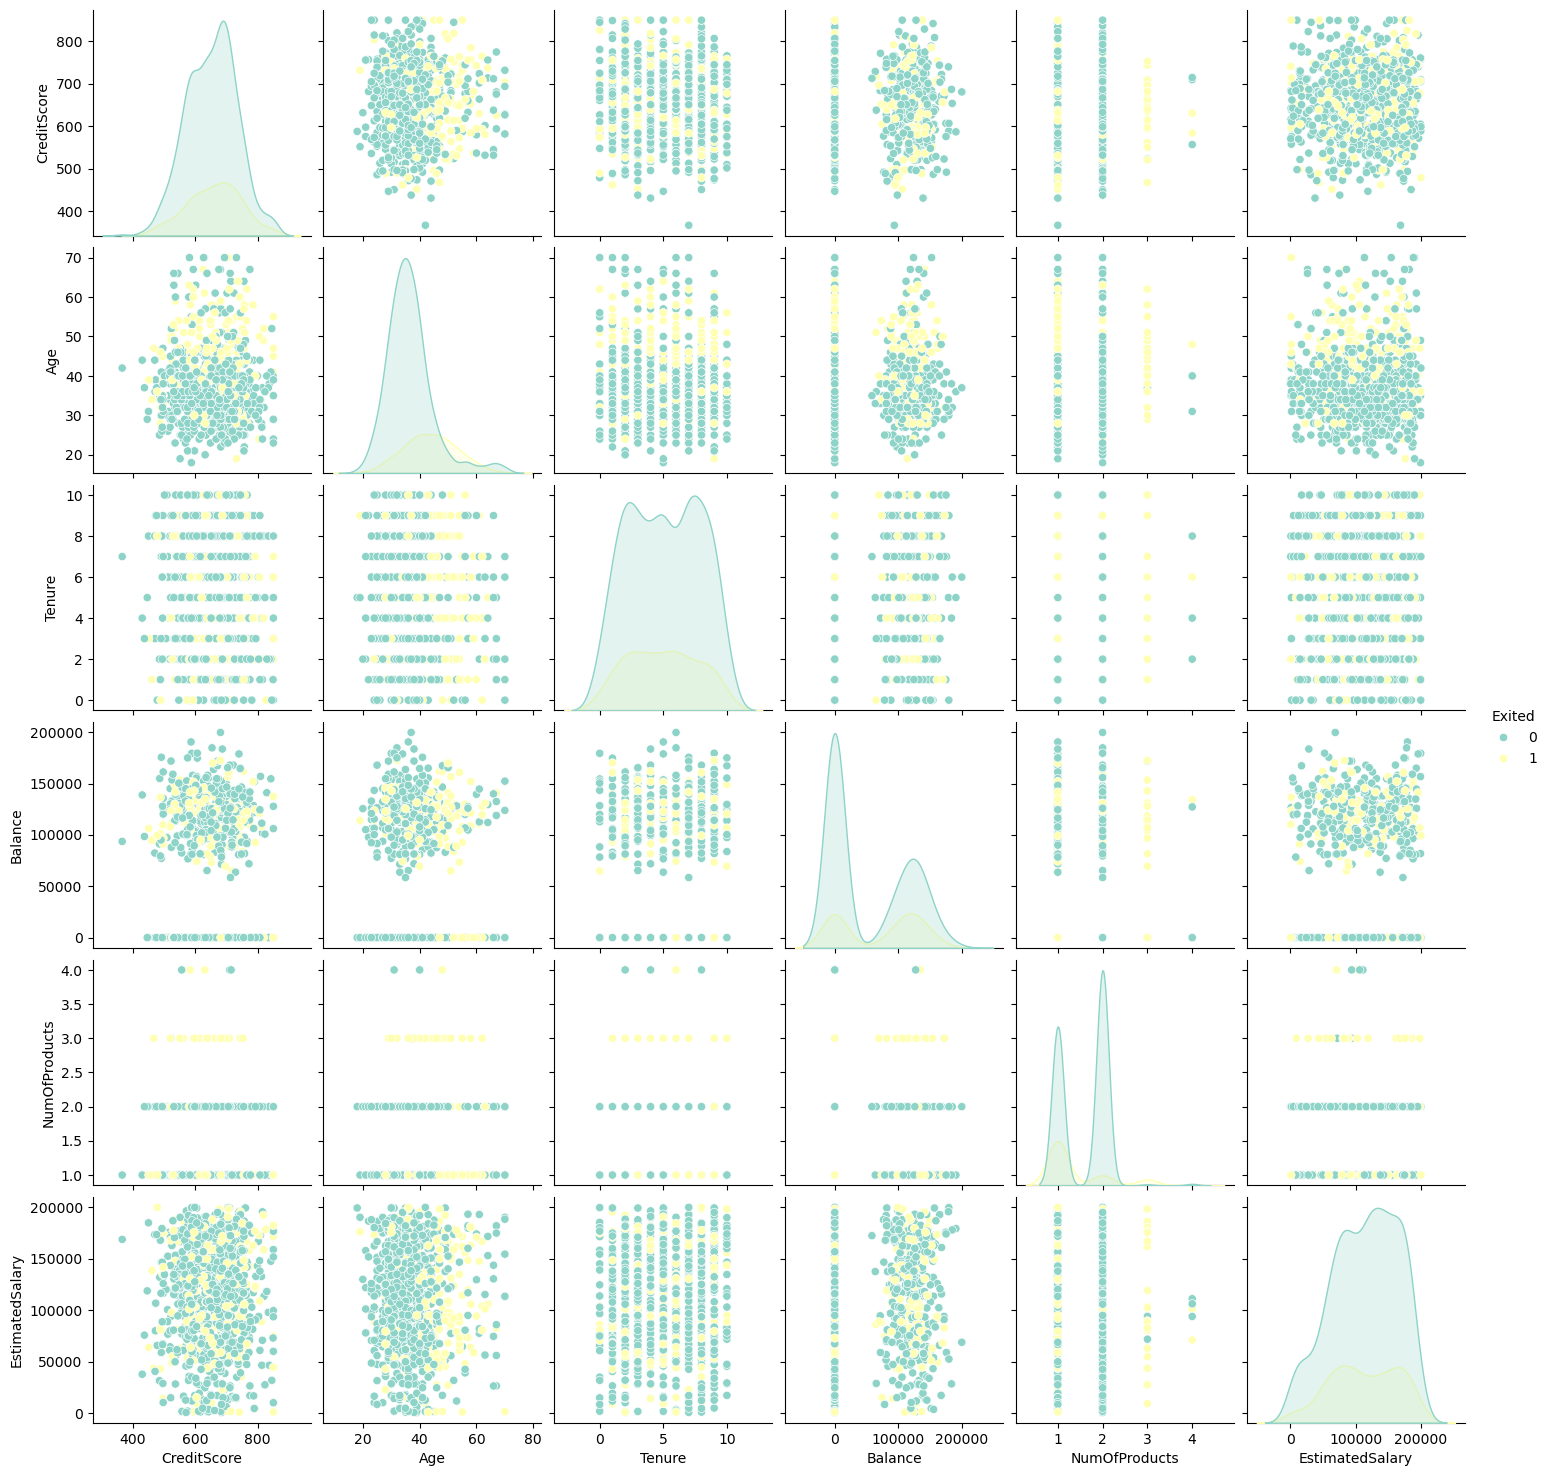

In [46]:
sns.pairplot(data=new_bank_df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',  'EstimatedSalary', 'Exited']].sample(1000), hue="Exited")

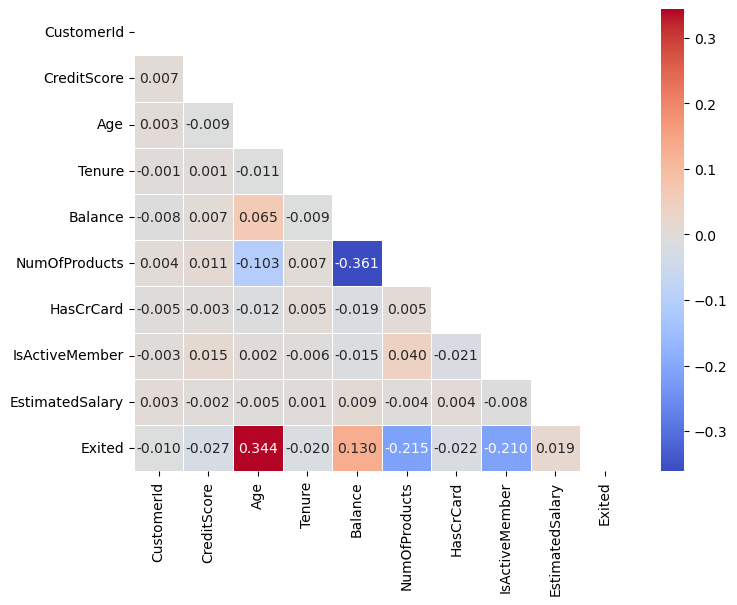

In [47]:
corr = new_bank_df[numeric_cols].corr()
# np.triu 함수를 이용해 matrix를 상삼각행렬로 만들기   
mask = np.triu(np.ones_like(corr))
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt='.3f', linewidths=.5, mask=mask, cmap='coolwarm')
plt.show()

### Feature Engineering

- 상호작용 변수

1. 월급에 대한 잔액 비중 
def acc_sal_tr(df):

    df['Balance_Salary_Ratio'] = df['Balance'] / df['EstimatedSalary']
    return df

df = acc_sal_tr(df)
test_df = acc_sal_tr(test_df)


2. 지리적 성별 (지리적+ '_' + 성별)
3. 토탈 제품 사용 (제품 갯수+ 신용카드)
4. 성별 총 제품 사용 
def acc_sal_tr(df):

    df['Balance_Salary_Ratio'] = df['Balance'] / df['EstimatedSalary']
    return df

df = acc_sal_tr(df)
test_df = acc_sal_tr(test_df)

(+ 성별 신용카드 사용)

### Smote Sampling

In [ ]:
#pip install imbalanced-learn

### Preprocessing Pipeline

In [144]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score

In [49]:
numeric_cols

['CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [50]:
category_cols

['Geography', 'Gender']

파이프라인 설계
- 전처리 preprocess
1. 원핫인코딩 - cat_features
2. 구간화 - 'Age','CreditScore'
3. 로버스트 스케일링 - num_features

- SMOTE
4. Smote resampling

- 모델 학습
5. xgb
6. random forest classifier



In [52]:
features = ['CreditScore','Age','Tenure','Balance', 'NumOfProducts','EstimatedSalary', 'HasCrCard', 'Geography', 'Gender','IsActiveMember']
num_features = ['CreditScore','Age','Tenure','Balance', 'NumOfProducts','EstimatedSalary']
cat_features = ['HasCrCard', 'Geography', 'Gender','IsActiveMember']
target = 'Exited'

In [206]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), cat_features),
        ('scaling',RobustScaler(), ['Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']),
        ('Age_binning', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform',subsample=None), ['Age']),
        ('CreditScore_binning', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform',subsample=None), ['CreditScore']),     
    ])

In [207]:
preprocessor

ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                 ['HasCrCard', 'Geography', 'Gender',
                                  'IsActiveMember']),
                                ('scaling', RobustScaler(),
                                 ['Tenure', 'Balance', 'NumOfProducts',
                                  'EstimatedSalary']),
                                ('Age_binning',
                                 KBinsDiscretizer(encode='ordinal',
                                                  strategy='uniform',
                                                  subsample=None),
                                 ['Age']),
                                ('CreditScore_binning',
                                 KBinsDiscretizer(encode='ordinal',
                                                  strategy='uniform',
                                                  subsample=None),
                                 ['CreditScore'])])

In [61]:
new_bank_df[features]

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,Geography,Gender,IsActiveMember
0,668,33,3,0.00,2,181449.97,1.0,France,Male,0.0
1,627,33,1,0.00,2,49503.50,1.0,France,Male,1.0
2,678,40,10,0.00,2,184866.69,1.0,France,Male,0.0
3,581,34,2,148882.54,1,84560.88,1.0,France,Male,1.0
4,716,33,5,0.00,2,15068.83,1.0,Spain,Male,1.0
...,...,...,...,...,...,...,...,...,...,...
165029,667,33,2,0.00,1,131834.75,1.0,Spain,Female,1.0
165030,792,35,3,0.00,1,131834.45,0.0,France,Male,0.0
165031,565,31,5,0.00,1,127429.56,1.0,France,Male,1.0
165032,554,30,7,161533.00,1,71173.03,0.0,Spain,Female,1.0


In [62]:
new_bank_df[target]

0         0
1         0
2         0
3         0
4         0
         ..
165029    0
165030    0
165031    0
165032    0
165033    1
Name: Exited, Length: 165034, dtype: int64

In [63]:
preprocessor.fit(new_bank_df[features], new_bank_df[features])

ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                 ['HasCrCard', 'Geography', 'Gender',
                                  'IsActiveMember']),
                                ('scaling', RobustScaler(),
                                 ['Tenure', 'Balance', 'NumOfProducts',
                                  'EstimatedSalary']),
                                ('Age_binning',
                                 KBinsDiscretizer(encode='ordinal',
                                                  strategy='uniform',
                                                  subsample=None),
                                 ['Age']),
                                ('CreditScore_binning',
                                 KBinsDiscretizer(encode='ordinal',
                                                  strategy='uniform',
                                                  subsample=None),
                                 ['CreditScore'])])

In [200]:
#파이프라인 전처리 잘 됬는지 확인

preprocessor = preprocessor.fit_transform(new_bank_df[features], new_bank_df[target])
pre_features = pd.DataFrame(preprocessor, index=preprocessor.get_feature_names_out())
pre_features

AttributeError: 'numpy.ndarray' object has no attribute 'fit_transform'

In [65]:
pre_features.shape

(165034, 15)

In [66]:
from collections import Counter
counter = Counter(new_bank_df[target])
print(counter)

Counter({0: 130113, 1: 34921})


### SMOTE

In [67]:
smt = SMOTE(random_state=42, sampling_strategy='not majority', k_neighbors=5)
features_smt, target_smt = smt.fit_resample(pre_features, new_bank_df[target])

In [68]:
features_smt.shape

(260226, 15)

In [69]:
target_smt.shape

(260226,)

In [70]:
from collections import Counter
#리샘플링 비율 확인 최대 데이터; 9430으로 맞춰짐
counter = Counter(target_smt)
print(counter)

Counter({0: 130113, 1: 130113})


features_smt, target_smt

In [71]:
train_X_smt , val_X_smt, train_y_smt, val_y_smt = \
train_test_split(features_smt, target_smt, test_size=0.2, random_state=42, stratify=target_smt)

In [73]:
train_X_smt.shape

(208180, 15)

In [74]:
train_y_smt.shape

(208180,)

In [75]:
val_X_smt.shape

(52046, 15)

In [76]:
val_y_smt.shape

(52046,)

### XGB

In [155]:
from xgboost import XGBClassifier
xgb = XGBClassifier(seed=42)

In [92]:
from sklearn.metrics import f1_score
def calculate_f1_score(model, X, y):
    """
    모델 예측값을 얻어 F1 스코어 반환하는 함수
    """
    # 모델의 예측값 얻기
    y_pred = model.predict(X)

    # F1 스코어 계산
    f1 = f1_score(y, y_pred, average='weighted') 

    return f1

In [197]:
xgb.fit(train_X_smt, train_y_smt)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [252]:
xgb.score(train_X_smt, train_y_smt)

0.8741665866077433

In [253]:
xgb.score(val_X_smt, val_y_smt)

0.8653883103408523

In [254]:
calculate_f1_score(xgb, train_X_smt, train_y_smt)

0.8741394293039567

In [198]:
pred_y = xgb.predict(train_X_smt)

In [199]:
roc_auc_score(pred_y, train_y_smt)

0.8744898056543721

In [158]:
calculate_roc_auc_score(xgb, val_X_smt, val_y_smt)

0.8653883103408523

In [161]:
#전처리 > smote 거친 전체 훈련 데이터 셋
features_smt, target_smt

(         0    1    2    3    4    5    6    7    8         9         10   11  \
 0       0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0 -0.500000  0.000000  0.0   
 1       0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0 -1.000000  0.000000  0.0   
 2       0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  1.250000  0.000000  0.0   
 3       0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0 -0.750000  1.241313 -1.0   
 4       0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.000000  0.000000  0.0   
 ...     ...  ...  ...  ...  ...  ...  ...  ...  ...       ...       ...  ...   
 260221  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0 -0.621461  1.071279 -1.0   
 260222  0.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.044219  0.904204 -1.0   
 260223  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0 -0.500000  1.007883 -1.0   
 260224  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.750000  1.009402 -1.0   
 260225  0.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.131069  0.000000 -1.0   
 
               12   13   1

In [ ]:
train_X_smt , val_X_smt, train_y_smt, val_y_smt = \
train_test_split(features_smt, target_smt, test_size=0.2, random_state=42, stratify=target_smt)

#### 랜덤 서치

In [169]:
#랜덤서치 - 전체 훈련 데이터 셋 넣기
xgb = XGBClassifier(seed=42)

from sklearn.model_selection import RandomizedSearchCV


xgb_param_dist = {
    'learning_rate': np.arange(0.05, 0.3, 0.03),  # 학습률
    'n_estimators': np.arange(120, 180, 10),  # 트리의 개수
    'max_depth': np.arange(6, 15, 1),  # 트리의 최대 깊이
    'subsample': np.arange(0.6, 1.0, 0.1),  # 각 트리에서 사용되는 데이터 샘플의 비율
    'colsample_bytree': np.arange(0.6, 1.0, 0.1),  # 각 트리에서 사용되는 특성의 비율
    'min_child_weight': np.arange(8, 15, 1),  # 자식 노드의 최소 가중치 합
    'gamma': np.arange(0, 0.5, 0.1),  # 트리의 리프 노드를 추가적으로 나눌지 결정하는 최소 손실 감소
}



# 랜덤 서치 객체 생성
random_search = RandomizedSearchCV(
    xgb, param_distributions=xgb_param_dist, n_iter=10, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1
)

random_search.fit(features_smt, target_smt)

# 최적의 모델 출력
print("최적의 모델:", random_search.best_estimator_)

최적의 모델: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.14, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=13, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=160, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [170]:
print('Score: ', random_search.best_score_)

Score:  0.9455860182610287


In [210]:
xgb_final_model = random_search.best_estimator_

In [211]:
xgb_final_model.fit(train_X_smt, train_y_smt)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.14, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=13, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=160, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [177]:
calculate_f1_score(xgb_final_model, train_X_smt, train_y_smt)

0.9001545757872373

In [183]:
pred_y = xgb_final_model.predict(train_X_smt)

In [184]:
roc_auc_score(train_y_smt,pred_y)

0.900168123739072

In [185]:
#검증

In [192]:
xgb_final_model.fit(val_X_smt, val_y_smt)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.14, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=13, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=160, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [201]:
xgb_final_model.score(val_X_smt, val_y_smt)

0.906966913883872

In [188]:
calculate_f1_score(xgb_final_model, val_X_smt, val_y_smt)

0.9069574826326935

In [193]:
pred_val_y = xgb_final_model.predict(val_X_smt)

In [195]:
roc_auc_score(val_y_smt,pred_val_y)

0.9069669138838721

### rfc

In [95]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)

In [227]:
rfc.fit(train_X_smt, train_y_smt)

RandomForestClassifier(random_state=42)

In [97]:
rfc.score(train_X_smt, train_y_smt)

0.999221827264867

In [98]:
calculate_f1_score(rfc, train_X_smt, train_y_smt)

0.9992218272647951

In [99]:
rfc.fit(val_X_smt, val_y_smt)

RandomForestClassifier(random_state=42)

In [100]:
calculate_f1_score(rfc, val_X_smt, val_y_smt)

0.9997886485025449

In [101]:
rfc.score(val_X_smt, val_y_smt)

0.9997886485032471

In [273]:
preprocessor

array([[ 0.        ,  1.        ,  1.        , ...,  0.78869839,
         1.        ,  3.        ],
       [ 0.        ,  1.        ,  1.        , ..., -0.85008492,
         1.        ,  2.        ],
       [ 0.        ,  1.        ,  1.        , ...,  0.83113426,
         2.        ,  3.        ],
       ...,
       [ 0.        ,  1.        ,  1.        , ...,  0.11776156,
         1.        ,  2.        ],
       [ 1.        ,  0.        ,  0.        , ..., -0.58094802,
         1.        ,  2.        ],
       [ 0.        ,  1.        ,  1.        , ..., -0.70007181,
         1.        ,  4.        ]])

### SMOTE 하기 전

In [79]:
from sklearn.model_selection import train_test_split


train_X , val_X, train_y, val_y = \
train_test_split(pre_features, new_bank_df[target], test_size=0.2, random_state=42, stratify=new_bank_df[target])

In [81]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)

In [82]:
rfc.fit(train_X , train_y)

RandomForestClassifier(random_state=42)

In [85]:
rfc.score(train_X , train_y)

0.9987199587963068

In [93]:
calculate_f1_score(rfc, train_X , train_y)

0.8342369995980029

In [86]:
rfc.fit(val_X , val_y)

RandomForestClassifier(random_state=42)

In [87]:
rfc.score(val_X , val_y)

0.9996061441512406

In [94]:
calculate_f1_score(rfc, val_X , val_y)

0.999606092550295

In [90]:
#클래스 비율
counter = Counter(train_y)
print(counter)

Counter({0: 104090, 1: 27937})


In [88]:
counter = Counter(val_y)
print(counter)

Counter({0: 26023, 1: 6984})


### Light GBM 

In [105]:
#pip install lightgbm

In [104]:
import lightgbm as lgb

In [106]:
lgbm = lgb.LGBMClassifier(random_state=42)

In [107]:
lgbm.fit(train_X_smt, train_y_smt)

[LightGBM] [Info] Number of positive: 104090, number of negative: 104090
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1637
[LightGBM] [Info] Number of data points in the train set: 208180, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(random_state=42)

In [142]:
lgbm.score(train_X_smt, train_y_smt)

0.7445575943894707

In [112]:
calculate_f1_score(lgbm, train_X_smt, train_y_smt)

0.8682899256599688

In [149]:
calculate_roc_auc_score(lgbm, train_X_smt, train_y_smt)

0.7445575943894706

In [109]:
lgbm.fit(val_X_smt, val_y_smt)

[LightGBM] [Info] Number of positive: 26023, number of negative: 26023
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1570
[LightGBM] [Info] Number of data points in the train set: 52046, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(random_state=42)

In [111]:
lgbm.score(val_X_smt, val_y_smt)

0.8767820773930753

In [113]:
calculate_f1_score(lgbm, val_X_smt, val_y_smt)

0.8767714645722139

In [150]:
calculate_roc_auc_score(lgbm, val_X_smt, val_y_smt)

0.7453406601852208

#### SMOTE 전

In [139]:
lgbm.fit(train_X , train_y)

[LightGBM] [Info] Number of positive: 27937, number of negative: 104090
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 553
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211601 -> initscore=-1.315304
[LightGBM] [Info] Start training from score -1.315304


LGBMClassifier(random_state=42)

In [116]:
lgbm.score(train_X , train_y)

0.8638233088686406

In [121]:
calculate_f1_score(lgbm, train_X, train_y)

0.8513338222115073

In [140]:
calculate_calculate_roc_auc_score(lgbm, train_X, train_y)

ValueError: continuous-multioutput format is not supported

In [119]:
lgbm.fit(val_X , val_y)

[LightGBM] [Info] Number of positive: 6984, number of negative: 26023
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 553
[LightGBM] [Info] Number of data points in the train set: 33007, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211591 -> initscore=-1.315359
[LightGBM] [Info] Start training from score -1.315359


LGBMClassifier(random_state=42)

In [120]:
lgbm.score(val_X , val_y)

0.870694095191929

In [122]:
calculate_f1_score(lgbm, val_X, val_y)

0.8623543410511384

#### 그리드 서치

In [173]:
from sklearn.metrics import roc_auc_score
roc_auc_score()
xgb.roc_auc_score(train_X_smt, train_y_smt)

AttributeError: 'XGBClassifier' object has no attribute 'roc_auc_score'

In [167]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'num_leaves': [48, 49, 50],
    'max_depth': [10, 11, 12],
    'learning_rate': [0.06, 0.07, 0.08],
    
}


grid_search_2 = GridSearchCV(lgbm, param_grid, cv=3, scoring='roc_auc' , verbose=2, n_jobs=-1)

# Fit the model with class imbalance handling and categorical features
grid_search_2.fit(features_smt, target_smt)

# Get the best parameters and best score
best_params_2 = grid_search_2.best_params_
best_score_2 = grid_search_2.best_score_

print("Best Parameters:", best_params_2)
print("Best roc_auc Score:", best_score_2)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[LightGBM] [Info] Number of positive: 130113, number of negative: 130113
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007880 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1637
[LightGBM] [Info] Number of data points in the train set: 260226, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best Parameters: {'learning_rate': 0.08, 'max_depth': 12, 'num_leaves': 50, 'scale_pos_weight': 1}
Best F1 Score: 0.94133169387394


In [129]:
# Use the best model for predictions
best_model_2 = grid_search_2.best_estimator_
y_pred_2 = best_model_2.predict(train_X_smt)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(train_y_smt, y_pred_2))
print(confusion_matrix(train_y_smt, y_pred_2))

#scroll the ouput till end to see the results

              precision    recall  f1-score   support

           0       0.86      0.89      0.88    104090
           1       0.88      0.86      0.87    104090

    accuracy                           0.87    208180
   macro avg       0.87      0.87      0.87    208180
weighted avg       0.87      0.87      0.87    208180

[[92324 11766]
 [14595 89495]]


In [134]:
calculate_f1_score(best_model_2, train_X_smt, train_y_smt) #그리드 서치 전 :0.8682899256599688

0.8733506153802878

In [152]:
calculate_roc_auc_score(best_model_2, train_X_smt, train_y_smt) #그리드 서치 전 :0.7445575943894706

0.8733740032664041

In [130]:
# Use the best model for predictions
best_model_2 = grid_search_2.best_estimator_
y_pred_2 = best_model_2.predict(val_X_smt)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(val_y_smt, y_pred_2))
print(confusion_matrix(val_y_smt, y_pred_2))

#scroll the ouput till end to see the results

              precision    recall  f1-score   support

           0       0.86      0.89      0.88     26023
           1       0.88      0.86      0.87     26023

    accuracy                           0.87     52046
   macro avg       0.87      0.87      0.87     52046
weighted avg       0.87      0.87      0.87     52046

[[23105  2918]
 [ 3668 22355]]


In [154]:
calculate_roc_auc_score(best_model_2, val_X_smt, val_y_smt) #0.7453406601852208

0.8734580947623256

In [203]:
test = pd.read_csv('test.csv')
test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [209]:
preprocessor.get_feature_names_out()

array(['cat__HasCrCard_0.0', 'cat__HasCrCard_1.0',
       'cat__Geography_France', 'cat__Geography_Germany',
       'cat__Geography_Spain', 'cat__Gender_Female', 'cat__Gender_Male',
       'cat__IsActiveMember_0.0', 'cat__IsActiveMember_1.0',
       'scaling__Tenure', 'scaling__Balance', 'scaling__NumOfProducts',
       'scaling__EstimatedSalary', 'Age_binning__Age',
       'CreditScore_binning__CreditScore'], dtype=object)

In [208]:
pre_test = preprocessor.fit_transform(test)
pre_test

array([[ 1.        ,  0.        ,  1.        , ...,  0.5380218 ,
         0.        ,  2.        ],
       [ 0.        ,  1.        ,  1.        , ..., -0.56468863,
         1.        ,  3.        ],
       [ 0.        ,  1.        ,  1.        , ...,  0.26249646,
         1.        ,  3.        ],
       ...,
       [ 0.        ,  1.        ,  1.        , ..., -1.26628697,
         0.        ,  3.        ],
       [ 0.        ,  1.        ,  1.        , ...,  0.511084  ,
         0.        ,  3.        ],
       [ 0.        ,  1.        ,  1.        , ..., -1.16748314,
         1.        ,  2.        ]])

In [213]:
xgb_pred_test = xgb_final_model.predict_proba(pre_test)

In [228]:
rfc_pred_test = rfc.predict_proba(pre_test)

In [224]:
final = pd.DataFrame(test.id)
final["Exited"] = xgb_pred_test[:, 1]

In [230]:
final = pd.DataFrame(test.id)
final["Exited"] = rfc_pred_test[:, 1]

In [229]:
final.to_csv('a_test.csv',index=False)

In [231]:
final.to_csv('b_test.csv',index=False)